In [1]:
!pip install -Uqq Pillow
!pip install -Uqq fastbook

from fastai.vision.widgets import *
import fastbook
from fastbook import *
import os
from PIL import Image
from IPython.display import display

In [2]:
#List directory names in the input directory
for dirpath, dirnames, _ in os.walk('/kaggle/input'):
    for dirname in dirnames:
        print(os.path.join(dirpath, dirname))

/kaggle/input/lung-xrays-english-labels
/kaggle/input/lung-xrays-english-labels/archive
/kaggle/input/lung-xrays-english-labels/archive/Lower density (pneumothorax, pneumomediastinum, pneumoperitoneum)
/kaggle/input/lung-xrays-english-labels/archive/Degenerative infectious diseases (tuberculosis , sarcoidosis, proteinosis, fibrosis)
/kaggle/input/lung-xrays-english-labels/archive/Obstructive pulmonary diseases (emphysema, bronchopneumonia, bronchiectasis, embolism)
/kaggle/input/lung-xrays-english-labels/archive/Inflammatory processes (pneumonia)
/kaggle/input/lung-xrays-english-labels/archive/Normal
/kaggle/input/lung-xrays-english-labels/archive/Higher density (pleural effusion, atelectatic consolidation, hydrothorax, empyema)
/kaggle/input/lung-xrays-english-labels/archive/Mediastinal changes (pericarditis, arteriovenous malformations, lymph node enlargement)
/kaggle/input/lung-xrays-english-labels/archive/Chest changes (atelectasis, malformations, agenesis, hypoplasia)
/kaggle/inpu

In [3]:
def is_normal(x): return x[0].isupper()

# Defining a DataBlock for processing the images
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

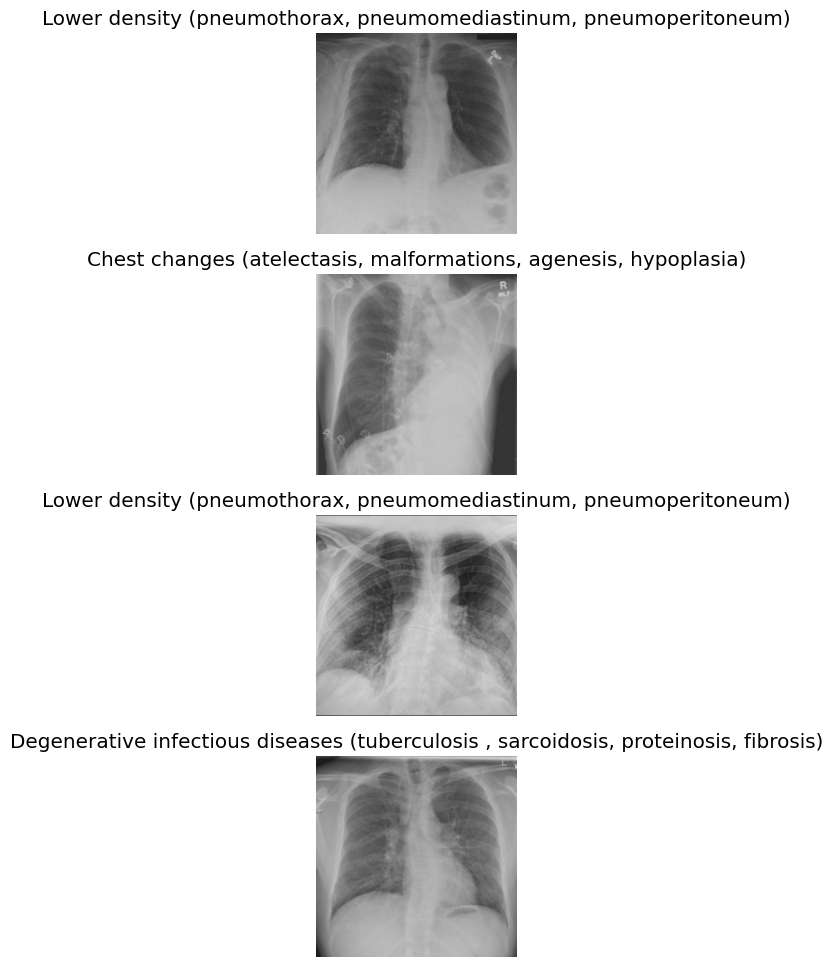

In [4]:
# Creating DataLoaders and displaying a batch of validation set images
path = '/kaggle/input/lung-xrays-english-labels/archive'
dls = xrays.dataloaders(path, label_func=is_normal)
dls.valid.show_batch(max_n=4, nrows=4)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 80.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.224838,0.643821,0.192136,25:34


epoch,train_loss,valid_loss,error_rate,time
0,0.351995,0.241201,0.070475,35:15
1,0.176419,0.169225,0.048220,35:06
2,0.078414,0.133425,0.039318,35:14
3,0.038166,0.102642,0.025964,35:20
4,0.022801,0.089561,0.023739,35:07


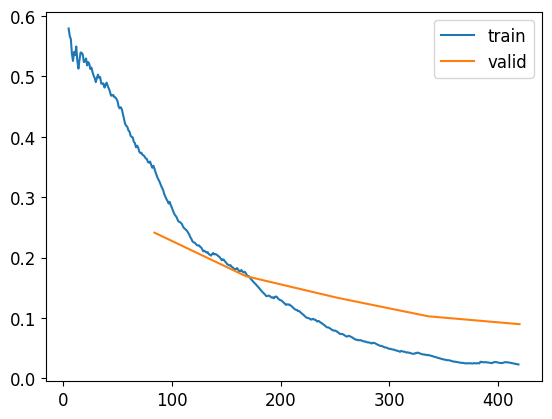

In [5]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(epochs=5)
learn.recorder.plot_loss()